In [2]:
library(tidyverse)
library(ggvenn)

In [10]:
######## load csv ######## 
Maya2_leaf <- read.csv("Total/Total_Maya2_leaf.csv")
Maya2_root <- read.csv("reference csv/Total_Maya2_root.csv")

######## make total table ######## 
colnames(Maya2_leaf)
colnames(Maya2_root)

TOTAL <- Maya2_leaf %>%
  dplyr::select("Gene", "Gene_Symbol", "Gene_Name", "Log2FC_WT", "Padj_WT", "Log2FC_fls2", "Padj_fls2") %>%
  dplyr::mutate(Maya2_root$Log2FC_WT, Maya2_root$Padj_WT, Maya2_root$Log2FC_fls2, Maya2_root$Padj_fls2) %>%
  dplyr::mutate(Maya2_leaf$GO)

colnames(TOTAL)

colnames(TOTAL) <- c("Gene", "Gene_Symbol", "Gene_Name", 
                     "Log2FC_WT_Maya2_leaf", "Padj_WT_Maya2_leaf", "Log2FC_fls2_Maya2_leaf", "Padj_fls2_Maya2_leaf",
                     "Log2FC_WT_Maya2_root", "Padj_WT_Maya2_root", "Log2FC_fls2_Maya2_root", "Padj_fls2_Maya2_root",
                    "GO")
colnames(TOTAL)

[1] "X"               "Gene"            "Gene_Symbol"     "Gene_Name"      
 [5] "Log2FC_WT"       "Padj_WT"         "Log2FC_fls2"     "Padj_fls2"      
 [9] "DMSO_WT_rep1"    "DMSO_WT_rep2"    "DMSO_WT_rep3"    "Maya2_WT_rep1"  
[13] "Maya2_WT_rep2"   "Maya2_WT_rep3"   "DMSO_fls2_rep1"  "DMSO_fls2_rep2" 
[17] "DMSO_fls2_rep3"  "Maya2_fls2_rep1" "Maya2_fls2_rep2" "Maya2_fls2_rep3"
[21] "GO"

[1] "X"                  "Gene"               "Gene_Symbol"       
 [4] "Gene_Name"          "Log2FC_WT"          "Padj_WT"           
 [7] "Log2FC_fls2"        "Padj_fls2"          "WT_0h_Maya2_rep1"  
[10] "WT_0h_Maya2_rep2"   "WT_0h_Maya2_rep3"   "WT_1h_Maya2_rep1"  
[13] "WT_1h_Maya2_rep2"   "WT_1h_Maya2_rep3"   "fls2_0h_Maya2_rep1"
[16] "fls2_0h_Maya2_rep2" "fls2_0h_Maya2_rep3" "fls2_1h_Maya2_rep1"
[19] "fls2_1h_Maya2_rep2" "fls2_1h_Maya2_rep3" "GO"

[1] "Gene"                   "Gene_Symbol"            "Gene_Name"             
 [4] "Log2FC_WT"              "Padj_WT"                "Log2FC_fls2"           
 [7] "Padj_fls2"              "Maya2_root$Log2FC_WT"   "Maya2_root$Padj_WT"    
[10] "Maya2_root$Log2FC_fls2" "Maya2_root$Padj_fls2"   "Maya2_leaf$GO"

[1] "Gene"                   "Gene_Symbol"            "Gene_Name"             
 [4] "Log2FC_WT_Maya2_leaf"   "Padj_WT_Maya2_leaf"     "Log2FC_fls2_Maya2_leaf"
 [7] "Padj_fls2_Maya2_leaf"   "Log2FC_WT_Maya2_root"   "Padj_WT_Maya2_root"    
[10] "Log2FC_fls2_Maya2_root" "Padj_fls2_Maya2_root"   "GO"

In [11]:
######## filtering step ######## 
Maya2_WT_leaf_UP <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya2_leaf > 1, Padj_WT_Maya2_leaf < 0.1)
Maya2_fls2_leaf_UP <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya2_leaf > 1, Padj_fls2_Maya2_leaf < 0.1)
Maya2_WT_leaf_UP_FLS2_Dep <- Maya2_WT_leaf_UP %>%
  dplyr::filter(!(Gene %in% Maya2_fls2_leaf_UP$Gene))

Maya2_WT_root_UP <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya2_root > 1, Padj_WT_Maya2_root < 0.1)
Maya2_fls2_root_UP <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya2_root > 1, Padj_fls2_Maya2_root < 0.1)
Maya2_WT_root_UP_FLS2_Dep <- Maya2_WT_root_UP %>%
  dplyr::filter(!(Gene %in% Maya2_fls2_root_UP$Gene))

Maya2_WT_leaf_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya2_leaf < -1, Padj_WT_Maya2_leaf < 0.1)
Maya2_fls2_leaf_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya2_leaf < -1, Padj_fls2_Maya2_leaf < 0.1)
Maya2_WT_leaf_DOWN_FLS2_Dep <- Maya2_WT_leaf_DOWN %>%
  dplyr::filter(!(Gene %in% Maya2_fls2_leaf_DOWN$Gene))

Maya2_WT_root_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya2_root < -1, Padj_WT_Maya2_root < 0.1)
Maya2_fls2_root_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya2_root < -1, Padj_fls2_Maya2_root < 0.1)
Maya2_WT_root_DOWN_FLS2_Dep <- Maya2_WT_root_DOWN %>%
  dplyr::filter(!(Gene %in% Maya2_fls2_root_DOWN$Gene))
######## list-up for venn diagram ######## 

vennlistUp <- list("Maya2_leaf_UP_only_WT" = Maya2_WT_leaf_UP_FLS2_Dep$Gene,
                  "Maya2_leaf_DOWN_only_WT" = Maya2_WT_leaf_DOWN_FLS2_Dep$Gene,
                  "Maya2_root_UP_only_WT" = Maya2_WT_root_UP_FLS2_Dep$Gene,
                  "Maya2_root_DOWN_only_WT" = Maya2_WT_root_DOWN_FLS2_Dep$Gene)
vennlistUp <- lapply(vennlistUp, function(x) x[!is.na(x)])

######## list-up for total up and down gene ######## 

UP_list <- append(vennlistUp$Maya2_leaf_UP_only_WT, vennlistUp$Maya2_root_UP_only_WT)
length(UP_list)
UP_list<-unique(UP_list)
length(UP_list)

DOWN_list <- append(vennlistUp$Maya2_leaf_DOWN_only_WT, vennlistUp$Maya2_root_DOWN_only_WT)
length(DOWN_list)
DOWN_list <- unique(DOWN_list)
length(DOWN_list)

[1] 585

[1] 581

[1] 520

[1] 519

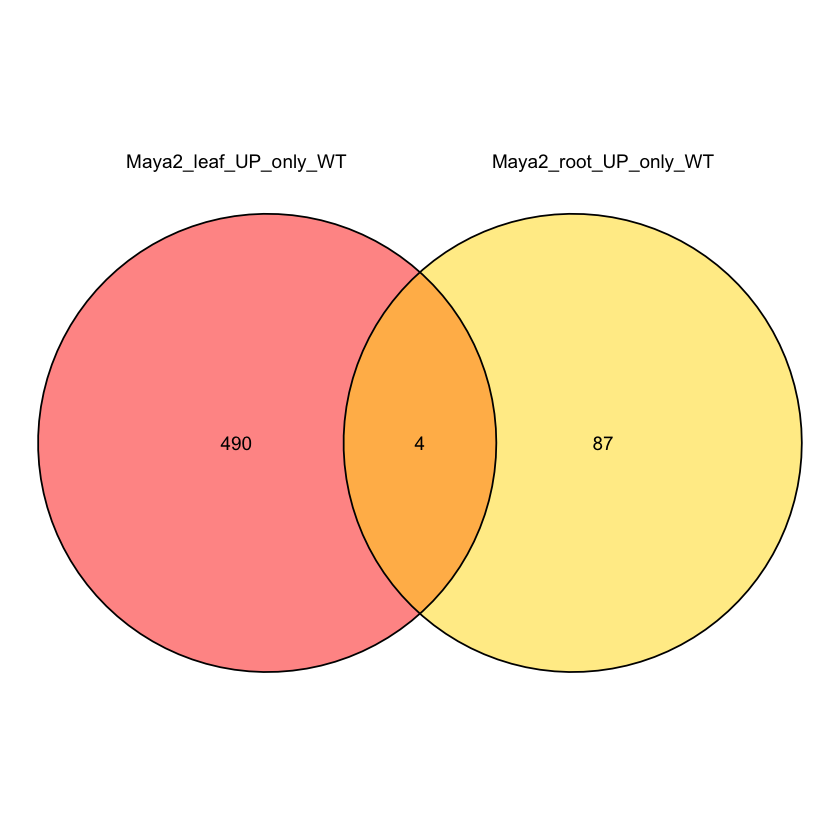

In [6]:
######## draw Venn diagram ########
ggvenn(vennlistUp, c("Maya2_leaf_UP_only_WT", "Maya2_root_UP_only_WT"),
       fill_color = c("#ff2800", "#ffda00", "#ffae42"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)


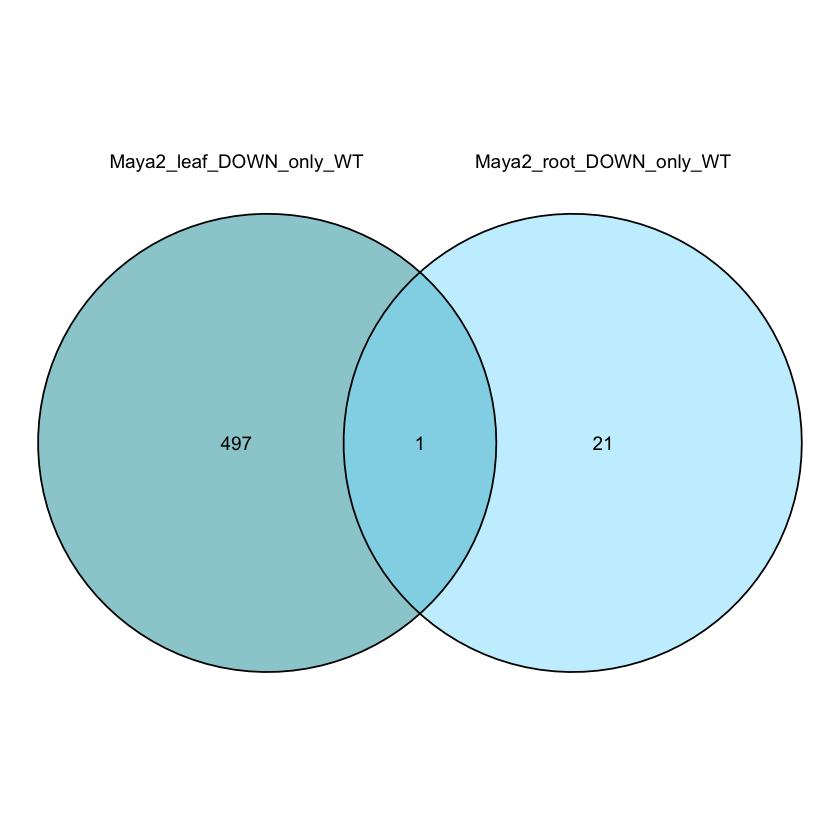

In [7]:
ggvenn(vennlistUp, c("Maya2_leaf_DOWN_only_WT", "Maya2_root_DOWN_only_WT"),
       fill_color = c("#0d9ba3", "#8ae0fe", "#4eabae"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

In [12]:
######### Export csv #########
# UP gene list up
Both_UP_list <- intersect(vennlistUp$Maya2_leaf_UP_only_WT, vennlistUp$Maya2_root_UP_only_WT)
Left_UP_list <- setdiff(vennlistUp$Maya2_leaf_UP_only_WT, vennlistUp$Maya2_root_UP_only_WT)
Right_UP_list <- setdiff(vennlistUp$Maya2_root_UP_only_WT, vennlistUp$Maya2_leaf_UP_only_WT)

# DOWN gene list up
Both_DOWN_list <- intersect(vennlistUp$Maya2_leaf_DOWN_only_WT, vennlistUp$Maya2_root_DOWN_only_WT)
Left_DOWN_list <- setdiff(vennlistUp$Maya2_leaf_DOWN_only_WT, vennlistUp$Maya2_root_DOWN_only_WT)
Right_DOWN_list <- setdiff(vennlistUp$Maya2_root_DOWN_only_WT, vennlistUp$Maya2_leaf_DOWN_only_WT)

######### filter TOTAL by list #########
Both_UP <- TOTAL %>%
  dplyr::filter(Gene %in% Both_UP_list)
nrow(Both_UP)
Left_UP <- TOTAL %>%
  dplyr::filter(Gene %in% Left_UP_list)
nrow(Left_UP)
Right_UP <- TOTAL %>%
  dplyr::filter(Gene %in% Right_UP_list)
nrow(Right_UP)

Both_DOWN <- TOTAL %>%
  dplyr::filter(Gene %in% Both_DOWN_list)
nrow(Both_DOWN)
Left_DOWN <- TOTAL %>%
  dplyr::filter(Gene %in% Left_DOWN_list)
nrow(Left_DOWN)
Right_DOWN <- TOTAL %>%
  dplyr::filter(Gene %in% Right_DOWN_list)
nrow(Right_DOWN)

[1] 4

[1] 490

[1] 87

[1] 1

[1] 497

[1] 21

In [13]:
######### write csv #########
write.csv(Both_UP,"Venn/02.Maya2L_vs_Maya2R/Both_UP.csv")
write.csv(Left_UP,"Venn/02.Maya2L_vs_Maya2R/Maya2L_only_UP.csv")
write.csv(Right_UP,"Venn/02.Maya2L_vs_Maya2R/Maya2R_only_UP.csv")
write.csv(Both_DOWN,"Venn/02.Maya2L_vs_Maya2R/Both_DOWN.csv")
write.csv(Left_DOWN,"Venn/02.Maya2L_vs_Maya2R/Maya2L_only_DOWN.csv.csv")
write.csv(Right_DOWN,"Venn/02.Maya2L_vs_Maya2R/Maya2R_only_DOWN.csv.csv")